In [1]:
from os.path import join
import numpy as np
from numpy.linalg import svd, inv
from numpy.random import permutation

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

In [2]:
# Load dataset
H = np.loadtxt(join('..', 'DATA', 'housing.data'))
b = H[:, -1] # housing values in $1000s
A = H[:, :-1] # other factors

# Pad with column of ones for nonzero offset (ie mean value of houses)
A = np.c_[A, np.ones(len(A))]

# Solve Ax=b using SVD
# Note that the book uses the Matlab-specific "regress" command
U, S, VT = svd(A, full_matrices=False)
Σ = np.diag(S)
x = VT.T @ inv(Σ) @ U.T @ b

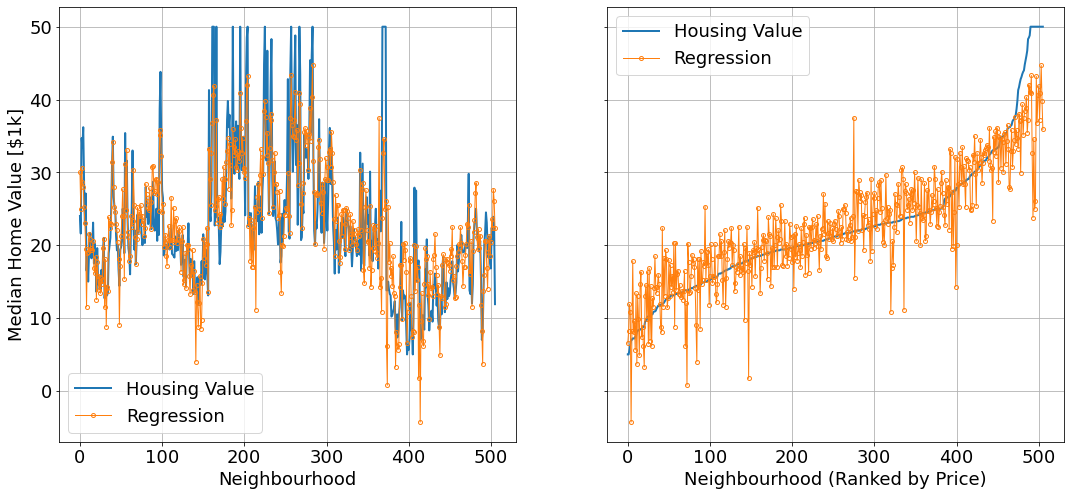

In [2]:
# Figure 1.11

fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

axs[0].plot(b, linewidth=2, label='Housing Value') # True relationship
axs[0].plot(A @ x, '-o', linewidth=1.0, markersize=4, mfc='none', label='Regression')
axs[0].set_xlabel('Neighbourhood')
axs[0].set_ylabel('Median Home Value [$1k]')
axs[0].legend()
axs[0].grid(True)

# Sorted values
sort_indices = np.argsort(b)
axs[1].plot(b[sort_indices], linewidth=2, label='Housing Value') # True relationship
axs[1].plot(A[sort_indices, :] @ x, '-o', linewidth=1.0, markersize=4, mfc='none', label='Regression')
axs[1].set_xlabel('Neighbourhood (Ranked by Price)')
axs[1].legend()
axs[1].grid(True);

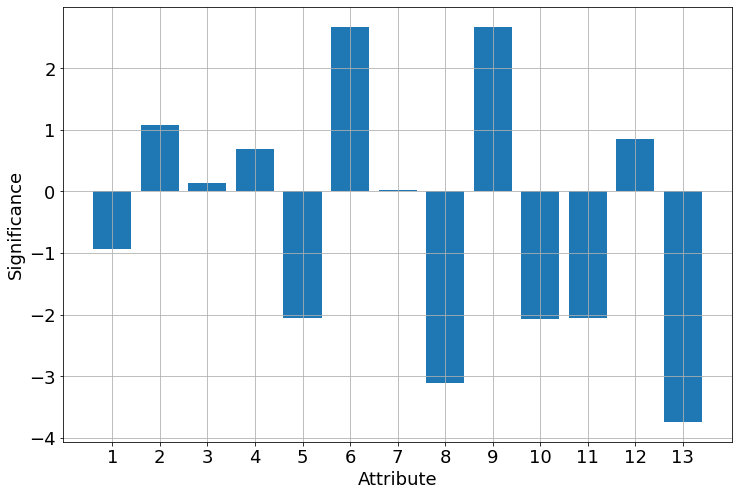

In [3]:
# De-mean and standardize columns of A (except for the intercept)
A2 = A - A.mean(axis=0)
A2[:, :-1] /= A2[:, :-1].std(axis=0)
A2[:, -1] = 1

U, S, VT = svd(A2, full_matrices=False)
Σ = np.diag(S)
x = VT.T @ inv(Σ) @ U.T @ b

# Figure 1.12
xticks = 1 + np.arange(len(x))

_, ax = plt.subplots(figsize=(12, 8))
ax.bar(xticks[:-1], x[:-1])
ax.set_xlabel('Attribute')
ax.set_ylabel('Significance')
ax.set_xticks(xticks[:-1])
ax.grid(True);
# NB doesn't seem to agree with the book figure as there was a problem in the original code: b was inadvertently sorted in place

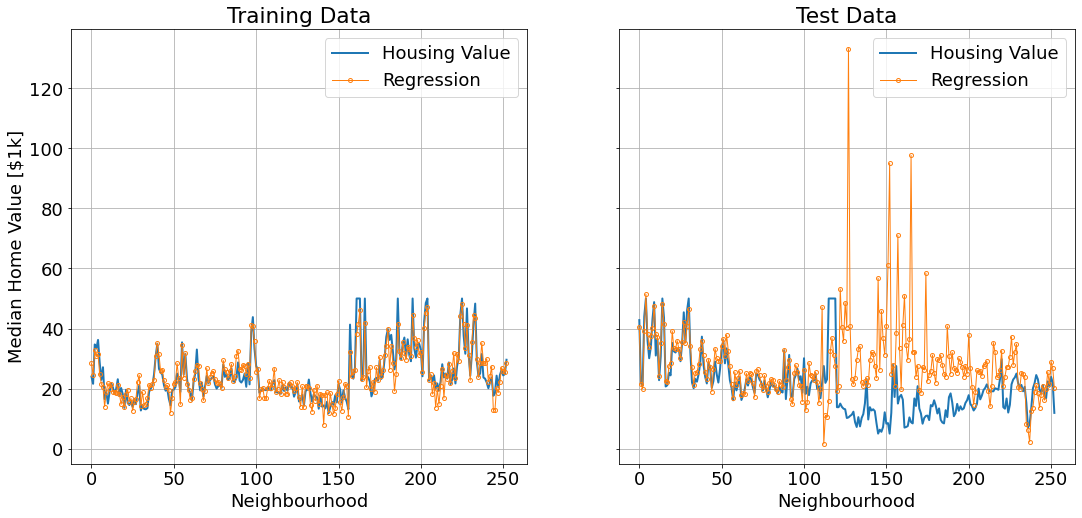

In [4]:
ntrain = len(A) // 2
Atrain, Atest = A[:ntrain], A[ntrain:]
btrain, btest = b[:ntrain], b[ntrain:]

U, S, VT = svd(Atrain, full_matrices=False)
Σ = np.diag(S)
x = VT.T @ inv(Σ) @ U.T @ btrain

fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

axs[0].plot(btrain, linewidth=2, label='Housing Value') # True relationship
axs[0].plot(Atrain @ x, '-o', linewidth=1.0, markersize=4, mfc='none', label='Regression')
axs[0].set_xlabel('Neighbourhood')
axs[0].set_ylabel('Median Home Value [$1k]')
axs[0].legend()
axs[0].grid(True)
axs[0].set_title('Training Data')

axs[1].plot(btest, linewidth=2, label='Housing Value') # True relationship
axs[1].plot(Atest @ x, '-o', linewidth=1.0, markersize=4, mfc='none', label='Regression')
axs[1].set_xlabel('Neighbourhood')
axs[1].legend()
axs[1].grid(True)
axs[1].set_title('Test Data');

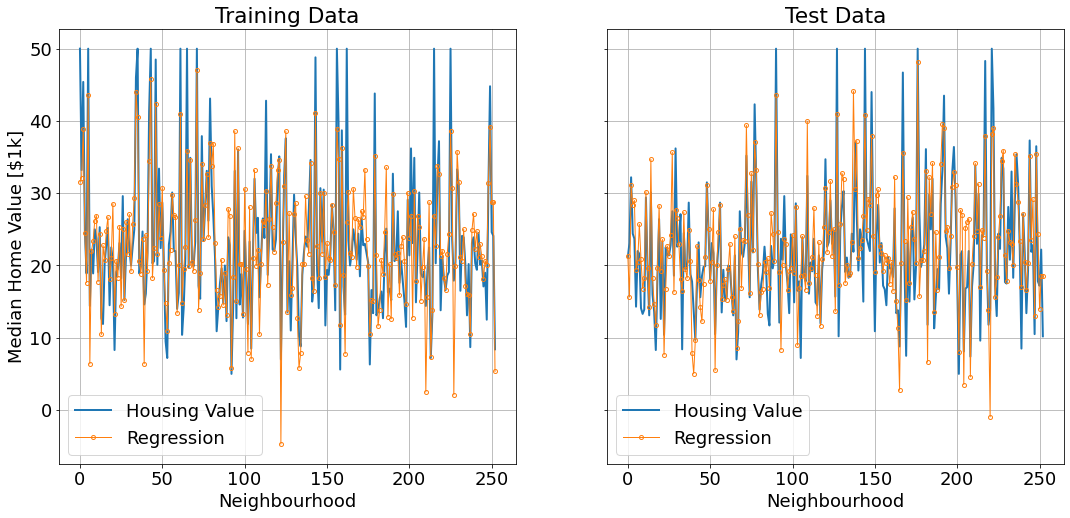

In [5]:
ntrain = len(A) // 2
p = permutation(len(A))
btrain, btest = b[p][:ntrain], b[p][ntrain:]
Atrain, Atest = A[p][:ntrain], A[p][ntrain:]

U, S, VT = svd(Atrain, full_matrices=False)
Σ = np.diag(S)
x = VT.T @ inv(Σ) @ U.T @ btrain

fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

axs[0].plot(btrain, linewidth=2, label='Housing Value') # True relationship
axs[0].plot(Atrain @ x, '-o', linewidth=1.0, markersize=4, mfc='none', label='Regression')
axs[0].set_xlabel('Neighbourhood')
axs[0].set_ylabel('Median Home Value [$1k]')
axs[0].legend()
axs[0].grid(True)
axs[0].set_title('Training Data')

axs[1].plot(btest, linewidth=2, label='Housing Value') # True relationship
axs[1].plot(Atest @ x, '-o', linewidth=1.0, markersize=4, mfc='none', label='Regression')
axs[1].set_xlabel('Neighbourhood')
axs[1].legend()
axs[1].grid(True)
axs[1].set_title('Test Data');